In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [5]:
df = pd.read_csv("country_wise_latest.csv")
df.sample(5)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
136,Qatar,109597,165,106328,3104,292,0,304,0.15,97.02,0.16,107037,2560,2.39,Eastern Mediterranean
95,Latvia,1219,31,1045,143,0,0,0,2.54,85.73,2.97,1192,27,2.27,Europe
15,Belarus,67251,538,60492,6221,119,4,67,0.80,89.95,0.89,66213,1038,1.57,Europe
165,Tajikistan,7235,60,6028,1147,43,1,58,0.83,83.32,1.00,6921,314,4.54,Europe
24,Brunei,141,3,138,0,0,0,0,2.13,97.87,2.17,141,0,0.00,Western Pacific


In [6]:

print(df.info())

print(df.isnull().sum())

print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [10]:
df.dtypes


Country/Region             object
Confirmed                   int64
Deaths                      int64
Recovered                   int64
Active                      int64
New cases                   int64
New deaths                  int64
New recovered               int64
Deaths / 100 Cases        float64
Recovered / 100 Cases     float64
Deaths / 100 Recovered    float64
Confirmed last week         int64
1 week change               int64
1 week % increase         float64
WHO Region                 object
dtype: object

In [44]:
#Columns: No null columns. So no drop


In [12]:
df.shape

(187, 15)

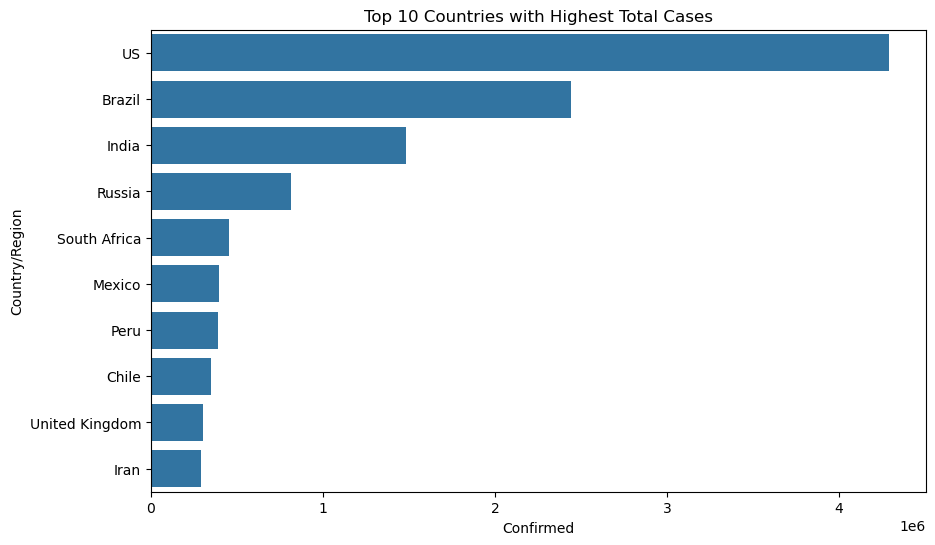

In [14]:
top_countries = df.nlargest(10, 'Confirmed')
plt.figure(figsize=(10, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=top_countries)
plt.title('Top 10 Countries with Highest Total Cases')
plt.show()


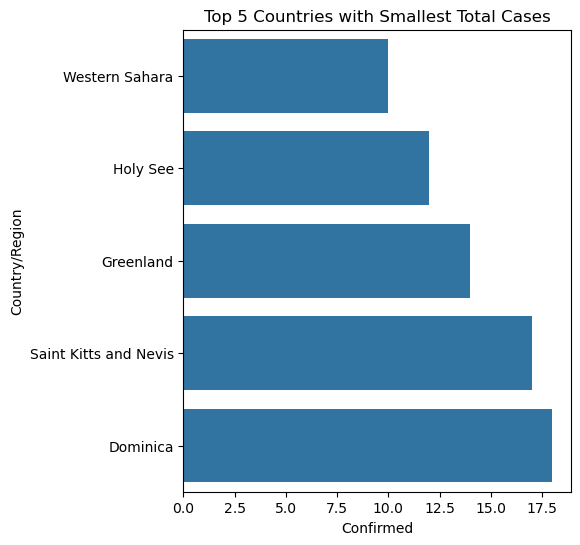

In [16]:
smallest_confirmed_case = df.nsmallest(5, 'Confirmed')
plt.figure(figsize=(5, 6))
sns.barplot(x='Confirmed', y='Country/Region', data=smallest_confirmed_case)
plt.title('Top 5 Countries with Smallest Total Cases')
plt.show()

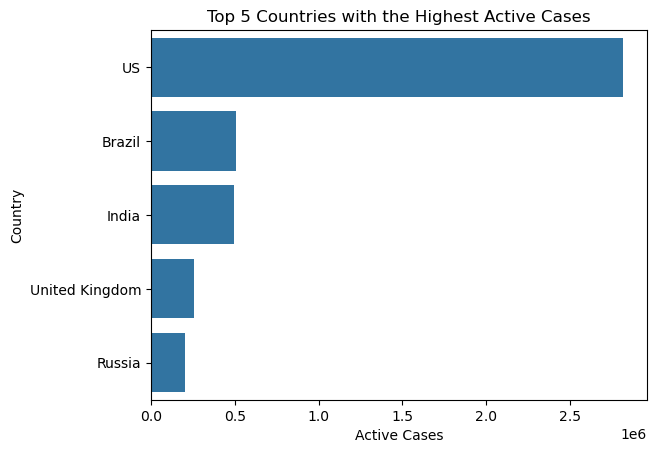

In [18]:
# Countries with the highest active cases
top_active_cases = df.nlargest(5, 'Active')

sns.barplot(x='Active', y='Country/Region', data=top_active_cases)
plt.title('Top 5 Countries with the Highest Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('Country')
plt.show()


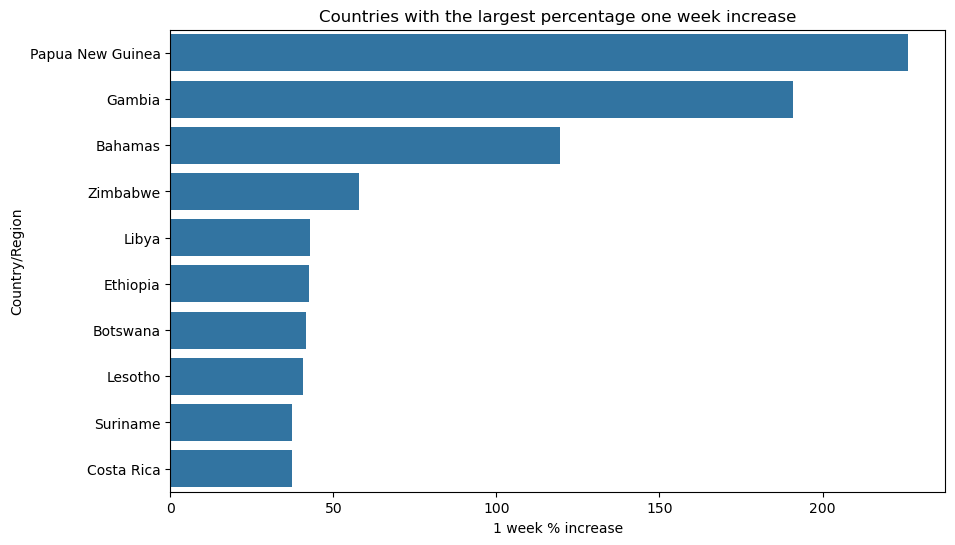

In [106]:

top_countries = df.nlargest(10, '1 week % increase')
plt.figure(figsize=(10, 6))
sns.barplot(x='1 week % increase', y='Country/Region', data=top_countries)
plt.title('Countries with the largest percentage one week increase')
plt.show()


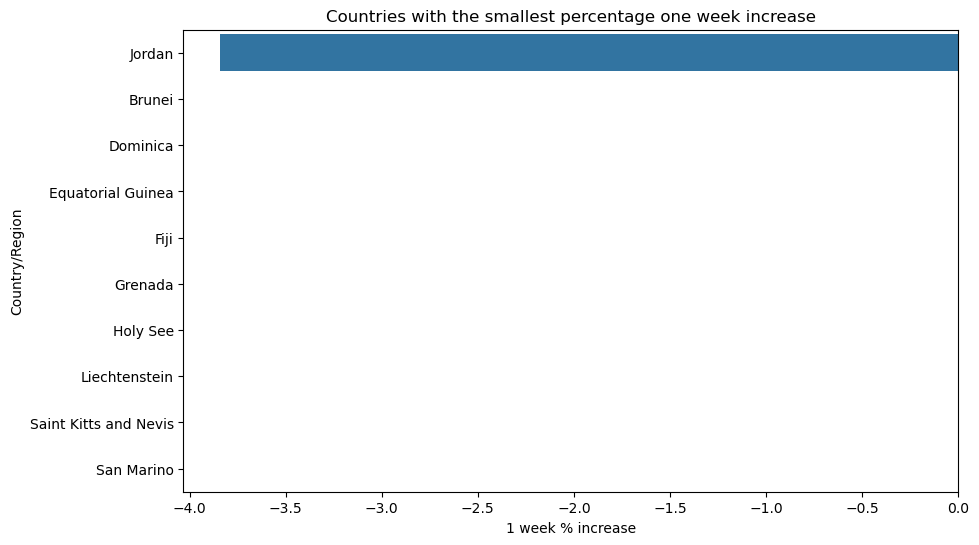

In [19]:
top_countries = df.nsmallest(10, '1 week % increase')
plt.figure(figsize=(10, 6))
sns.barplot(x='1 week % increase', y='Country/Region', data=top_countries)
plt.title('Countries with the smallest percentage one week increase')
plt.show()

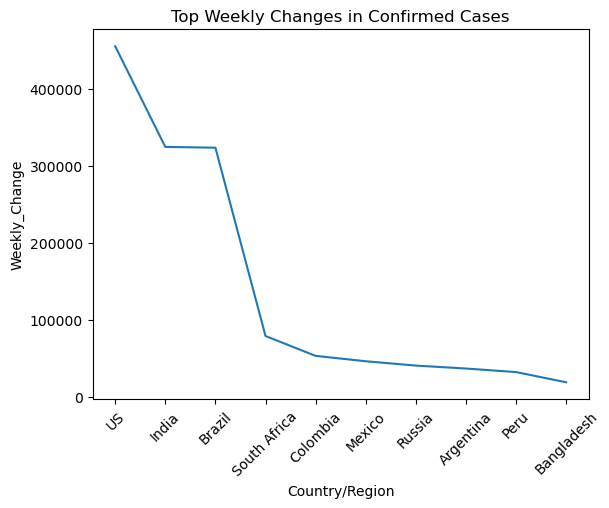

In [138]:
# Assuming 'Comparison' contains the weekly change in confirmed cases
df['Weekly_Change'] = Comparison  
top_ten = df.sort_values(by='Weekly_Change', ascending=False).head(10)

sns.lineplot(x='Country/Region', y='Weekly_Change', data=top_ten)  
plt.title('Top Weekly Changes in Confirmed Cases')
plt.xticks(rotation=45)
plt.show()

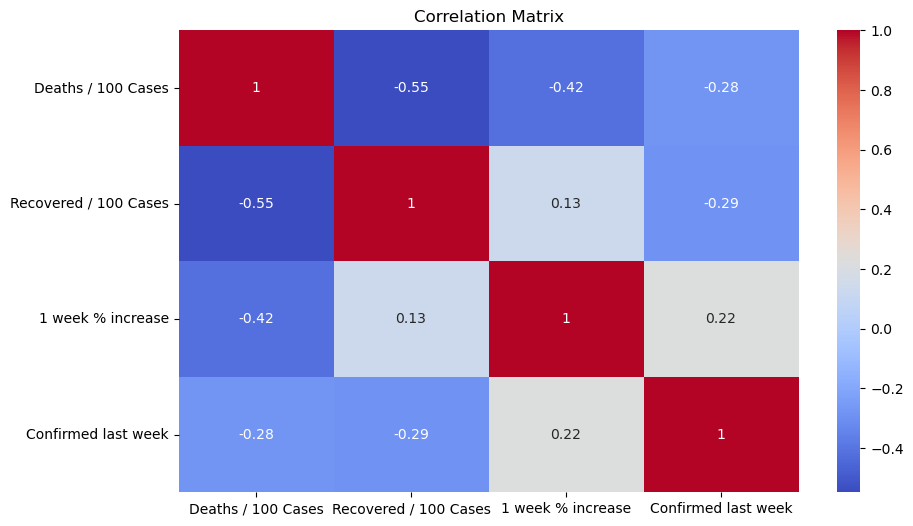

In [147]:
top_10_countries = df.nlargest(10, 'Confirmed')
plt.figure(figsize=(10, 6))
correlation = top_10_countries[['Deaths / 100 Cases', 'Recovered / 100 Cases', '1 week % increase', 'Confirmed last week']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


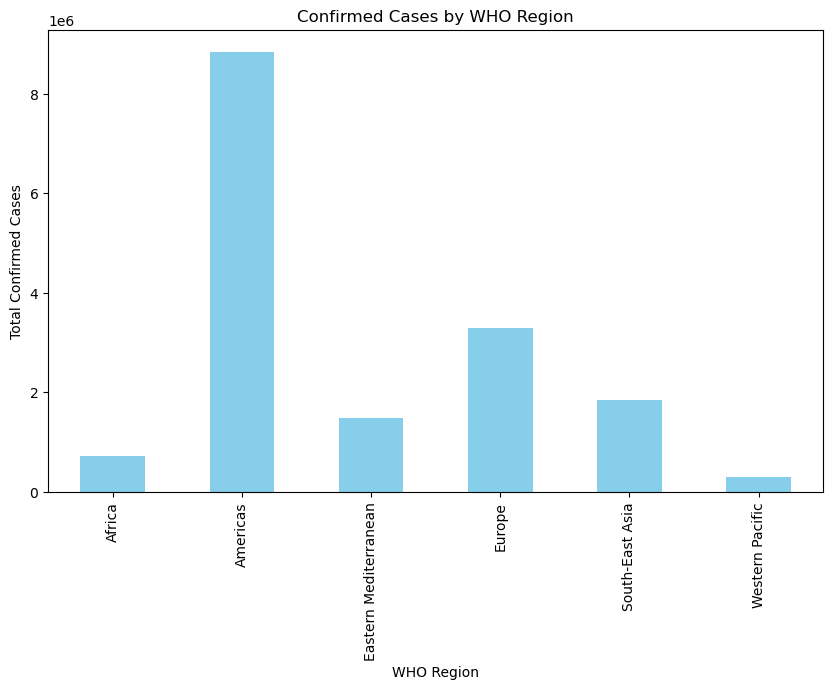

In [153]:
# Group by WHO Region
regional_summary = df.groupby('WHO Region').sum()[['Confirmed', 'Deaths', 'Recovered']]

# Plot confirmed cases by WHO Region
regional_summary['Confirmed'].plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Confirmed Cases by WHO Region')
plt.xlabel('WHO Region')
plt.ylabel('Total Confirmed Cases')
plt.show()


In [175]:
sns.scatterplot(x='Confirmed', y='Active', hue='WHO Region', data=df)
plt.title('Active Cases vs Total Confirmed Cases')


Text(0.5, 1.0, 'Active Cases vs Total Confirmed Cases')